#**Libraries**

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams[ 'figure.figsize' ] = (10, 8)
mpl.rcParams['axes.grid'] = False

#**Data Import NYC Energy**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [3]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [4]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


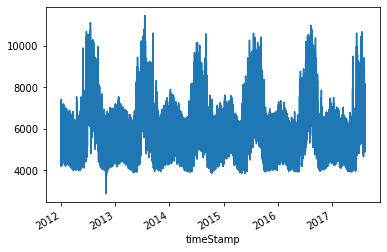

In [5]:
n_df=df.set_index('timeStamp')
n_df.demand.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f132270b8>,
      dtype=object)

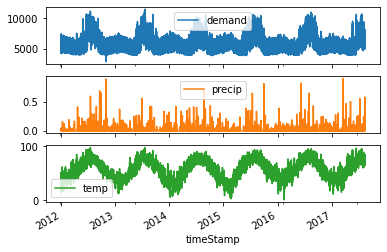

In [6]:
n_df.plot(subplots=True)

#**Removing the NA values**

In [7]:
df.query('demand != demand')#NA is an object and not going to match . We are visualiziling the NA rows of demand columns

,timeStamp,demand,precip,temp
49124,2012-03-11 02:00:00,NaN,0.0000,37.78
49125,2013-03-10 02:00:00,NaN,0.0000,38.18
49126,2014-03-09 02:00:00,NaN,0.0000,40.86
49127,2015-03-08 02:00:00,NaN,0.0000,36.96
49128,2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [8]:
df['demand']=df['demand'].fillna(method='ffill')
df['temp']=df['temp'].fillna(method='ffill') #Forward fill

In [9]:
df.isnull().any()

timeStamp    False
demand       False
precip        True
temp         False
dtype: bool

In [10]:
n_df=df.set_index('timeStamp')

#**ARIMA Implementation**

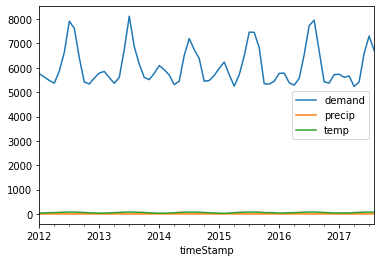

In [11]:
n_df.resample('M').mean().plot()#Mean of month values

In [12]:
n_df_monthly=n_df.resample('M').mean()

In [14]:
import pmdarima as pm
model = pm.auto_arima(n_df_monthly['demand'],m=12,seasonal=True,start_p=0,start_q=0,max_order=4,test='adf',error_action='ignore',suppress_warnings=True,stepwise=True,trace=True)
# suppress_warnings : bool, optional (default=False)
# Many warnings might be thrown inside of statsmodels. If suppress_warnings is True, all of the warnings coming from ARIMA will be squelched
# stepwise : bool, optional (default=True)
# Whether to use the stepwise algorithm outlined in Hyndman and Khandakar (2008) to identify the optimal model parameters. 
# The stepwise algorithm can be significantly faster than fitting all (or a random subset of) hyper-parameter combinations and 
# is less likely to over-fit the model.

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.53 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1026.318, Time=1.48 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1101.718, Time=0.05 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.059, Time=0.60 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.08 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1013.801, Time=1.99 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=in

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Sat, 07 Nov 2020   AIC                            993.144
Time:                                         16:44:23   BIC                           1006.461
Sample:                                              0   HQIC                           998.420
                                                  - 68                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.261      4.697      0.000    2168.819    5274.425
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (Q):                       64.20   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.01   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
n_df_monthly.index.get_level_values(0)

In [22]:
train=n_df_monthly[(n_df_monthly.index.get_level_values(0)>= '2012-01-31') & (n_df_monthly.index.get_level_values(0) <= '2017-04-30')]
test=n_df_monthly[(n_df_monthly.index.get_level_values(0) > '2017-04-30')]

In [23]:
model.fit(train['demand'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [24]:
forecast=model.predict(n_periods=4,return_conf_int=True)

In [25]:
forecast

(array([5320.83276481, 6194.15059103, 7184.10813912, 7297.99963102]),
 array([[4724.3701973 , 5917.29533232],
        [5391.43561482, 6996.86556723],
        [6358.6199663 , 8009.59631194],
        [6467.74937119, 8128.24989086]]))

In [26]:
forecast_df=pd.DataFrame(forecast[0],index=test.index,columns=['Prediction'])
forecast_df

,Prediction
timeStamp,
2017-05-31,5320.832765
2017-06-30,6194.150591
2017-07-31,7184.108139
2017-08-31,7297.999631


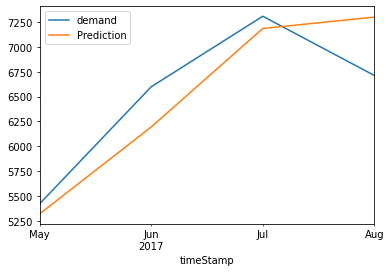

In [28]:
pd.concat([test['demand'],forecast_df],axis=1).plot()

#**Prediction for Longer Periods**

In [29]:
forecast1=model.predict(n_periods=8,return_conf_int=True)

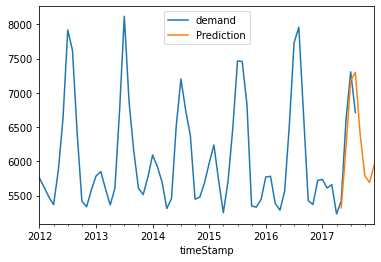

In [31]:
forecast_range=pd.date_range(start='2017-05-31',periods=8,freq='M')
forecast1_df=pd.DataFrame(forecast1[0],index=forecast_range,columns=['Prediction'])
pd.concat([n_df_monthly['demand'],forecast1_df],axis=1).plot()

#**Confidence Intervals**

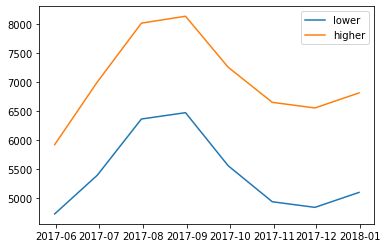

In [32]:
x=forecast_range
y=forecast1[1][:,0]
z=forecast1[1][:,1]
plt.plot(x,y)
plt.plot(x,z)
plt.legend(['lower','higher'])
plt.show()

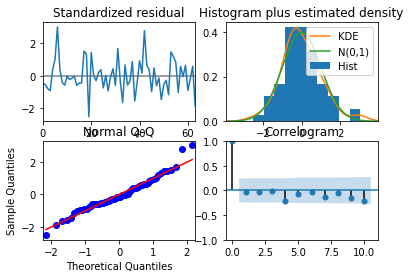

In [33]:
ot=model.plot_diagnostics()